In [2]:
import numpy as np
from netCDF4 import Dataset
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [ ]:
path_to_model = "/mnt/data-weather/moddata/modgrb/"
path_to_satellite = "/mnt/data-weather/satdata/goes13.2017.002.141518.BAND_02.nc"
path_to_radar = "/mnt/data-weather/raddata/raddat/radar.20170102.14.dat"

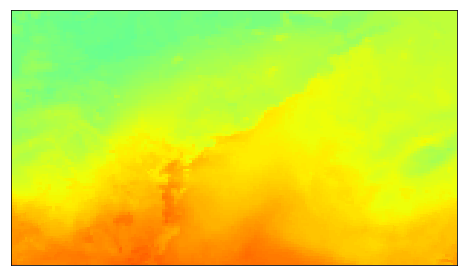

In [56]:
file = "/mnt/data-weather/moddata/modgrb/namanl_218_20170101_0000_000.grb"
grbs = pygrib.open(file)
grb = grbs.select(name="Temperature")[0]
grbs.close()
#print(grb)
#print(grb.projparams)
data = grb.values
#print(data.shape)
lat,lon = grb.latlons()
#print(lat.shape, lat.min(), lat.max(), lon.shape, lon.min(), lon.max())
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='mill',        
            resolution=None,
            llcrnrlon=-102,
            urcrnrlon=-82,
            llcrnrlat=31,
            urcrnrlat=41)
            #projection=grb.projparams['proj'],
            #lon_0=grb.projparams['lon_0'],
            #lat_0=grb.projparams['lat_0'],
            #lat_1=grb.projparams['lat_1'],
            #lat_2=grb.projparams['lat_2'],
            #width=grb.projparams['a'],
            #height=grb.projparams['b'])
x,y = m(lon,lat)
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
plt.show()
plt.close(fig)

(292, 996)
(292, 996) 28.400393 44.67724 (292, 996) -114.66983 -79.00447


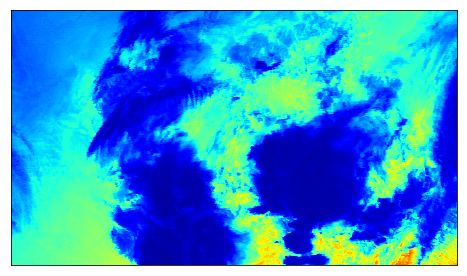

In [57]:
file = "/mnt/data-weather/satdata/goes13.2017.002.141518.BAND_02.nc"
nc_fid = Dataset(file, 'r')
data = nc_fid.variables['data'][:][0] # extracting the data we want from the file
lat = nc_fid.variables['lat'][:]
lon = nc_fid.variables['lon'][:]
nc_fid.close()
print(data.shape)
print(lat.shape, lat.min(), lat.max(), lon.shape, lon.min(), lon.max())
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='mill',        
            resolution=None,
            llcrnrlon=-102,
            urcrnrlon=-82,
            llcrnrlat=31,
            urcrnrlat=41)
x,y = m(lon,lat)
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
plt.show()
plt.close(fig)

In [ ]:
grbs = pygrib.open(path_to_model)
#for grb in grbs:
#    print(grb)
grb = grbs.select(name='Total Cloud Cover')[0]
grbs.close()
print(grb.projparams)
#data = grb.values
#lats, lons = grb.latlons()
#print(data.shape, lats[100][0])

In [ ]:
grbs = pygrib.open(path_to_model2)
#for grb in grbs:
#    print(grb)
grb = grbs.select(name='Total Cloud Cover')[0]
grbs.close()
data = grb.values
lats, lons = grb.latlons()
print(data.shape, lats[100][0])

In [ ]:
grbs = pygrib.open(path_to_model2)
for grb2 in grbs:
    print(grb2)
grb2 = grbs.select(name='Total Cloud Cover')[0]
grbs.close()

In [ ]:
mod_data2 = grb2.values
mod_data = mod_data - mod_data2
rex = mod_data
rex[mod_lats < 31.0] = -1.0
rex[mod_lats > 41.0] = -1.0
rex[mod_lons < -102.0] = -1.0
rex[mod_lons > -82.0] = -1.0
mod_1d_data = rex[rex != -1.0]
print(mod_1d_data.shape)
plt.imshow(rex, cmap='gray', origin='lower')
plt.colorbar()

In [ ]:
mod_data = grb.values
mod_lats, mod_lons = grb.latlons()
print(mod_data.shape, mod_lats.shape, mod_lons.shape)
rex = mod_data
rex[mod_lats < 31.0] = -10.0
rex[mod_lats > 41.0] = -10.0
rex[mod_lons < -102.0] = -10.0
rex[mod_lons > -82.0] = -10.0
mod_1d_data = rex[rex != -1.0]
print(mod_1d_data.shape)
plt.imshow(rex, cmap='gray', origin='lower')
plt.colorbar()

In [ ]:
temp_data, temp_lats, temp_lons = grb.data(lat1=31.0,lat2=41.0,lon1=-102.0,lon2=-82.0)
print(temp_data.shape, temp_lats.shape, temp_lons.shape)
temp_data = (temp_data/temp_data.max())*30
plt.scatter(x=temp_lons, y=temp_lats, s=temp_data, c=temp_data, cmap='gray')
plt.colorbar()

In [ ]:
nc_fid = Dataset(path_to_satellite, 'r') # "opening" the satellite data file 
print(nc_fid) # this should print out all the information of the file, similar to a pandas dataframe
data = nc_fid.variables['data'][:][0] # extracting the data we want from the file
lat = nc_fid.variables['lat'][:]
lon = nc_fid.variables['lon'][:]
print("Data Shape: ", data.shape) # this should print out a 3D array where data(time, y, x)
print("lat shape", lat.max(), lat.min())
print("lon", lon.max(), lon.min())
plt.imshow(data, cmap='gray', origin='lower')
plt.colorbar()
nc_fid.close() # closing the file after using it

In [ ]:
rex = data
rex[lat < 31.0] = -1.0
rex[lat > 41.0] = -1.0
rex[lon < -102.0] = -1.0
rex[lon > -82.0] = -1.0
sat_1d_data = rex[rex != -1.0]
sat_1d_lats = lat[rex != -1.0]
sat_1d_lons = lon[rex != -1.0]
print(sat_1d_data.shape, sat_1d_lats.shape, sat_1d_lons.shape)
plt.imshow(rex, cmap='gray', origin='lower')
plt.colorbar()

In [ ]:
sat_1d_data = (sat_1d_data/sat_1d_data.max())*30
plt.scatter(x=sat_1d_lons, y=sat_1d_lats, s=sat_1d_data, c=sat_1d_data, cmap='Greys')
plt.colorbar()

In [ ]:
rex = np.reshape(data,(290832,))
rex.shape

In [ ]:
rad_lat = np.linspace(31.0, 41.0, 126)
rad_lon = np.linspace(-102.0, -82.0, 201)
print(rad_lat.shape)
print(rad_lon.shape)
print(rad_dat.shape)
plt.imshow(rad_dat, cmap='gray', origin='lower')
plt.colorbar()

In [ ]:
dims = (126, 201)
rad_dat = np.fromfile(path_to_radar, dtype='int16', count=-1, sep='')
rad_dat = np.reshape(rad_dat, dims)

In [ ]:
lat[lat < 31.0] = 0.0
lat[lat > 41.0] = 0.0
lon[lon < -102.0] = 0.0
lon[lon > -82.0] = 0.0

In [ ]:
for row in range(0,lat.shape[0]):
    for col in range(0,lat.shape[1]):
        if lat[row][col] != 0:
            print(row, col)
            break
for row in range(0,lat.shape[0]):
    for col in range(0,lat.shape[1]):
        if lon[row][col] != 0:
            print(row, col)
            break

In [ ]:
blah = data[36:250][102:310]

In [ ]:
bleh = data[0][0]
print(bleh.shape)

In [ ]:
print(blah.shape)

In [ ]:
plt.imshow(blah, cmap='Greys', origin='lower')
plt.colorbar()